<img src="https://i.ibb.co/k1jrqqc/NA.png" style="float: left; margin: 20px; height: 55px; border-radius:50%;">

# EXPLORATORY DATA ANALYSIS: `ACT Exam Data`

_Author: Naresh V

----

## Problem Statement

To study the ACT examination data for the year 2018 and 2019. Also to prepare the data which could be used as input to machine learning model.


## Import Libraries 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Importing data

In [2]:
df1 = pd.read_csv('data/act_2018.csv')
df2 = pd.read_csv('data/act_2019.csv')

In [3]:
df1.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [4]:
df2.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


### Cleaning data

In [5]:
# To check for missing values in df1
df1.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

In [6]:
# To check for missing values in df2
df2.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [9]:
# To rename columns in df1
df1_renamed = df1.rename( columns = {"State":"state", "Participation":"participation_2018", "Composite":"composite_2018"} )
df1_renamed.head()

,state,participation_2018,composite_2018
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [10]:
# To rename columns in df 2
df2_renamed = df2.rename( columns = {"State":"state", "Participation":"participation_2019", "Composite":"composite_2019"} )
df2_renamed.head()

,state,participation_2019,composite_2019
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [11]:
# To merge df1 and df2
data = df1_renamed.merge(df2_renamed, on = ['state'], how = 'inner')
data = data.drop_duplicates()
data.head()

,state,participation_2018,composite_2018,participation_2019,composite_2019
0,Alabama,100%,19.1,100%,18.9
1,Alaska,33%,20.8,38%,20.1
2,Arizona,66%,19.2,73%,19.0
3,Arkansas,100%,19.4,100%,19.3
4,California,27%,22.7,23%,22.6


In [12]:
# To remove special characters
def cleaning(symbol):
    temp = symbol.replace('%', '')  #replaces the % symbol
    
    return float(temp) / 100

In [13]:
# To remove special characters in the dataframe
final_column_list = data.columns.to_list()
data[final_column_list[1]] = data[final_column_list[1]].apply( lambda x: cleaning(x) )
data[final_column_list[3]] = data[final_column_list[3]].apply( lambda x: cleaning(x) )
data.head()


,state,participation_2018,composite_2018,participation_2019,composite_2019
0,Alabama,1.00,19.1,1.00,18.9
1,Alaska,0.33,20.8,0.38,20.1
2,Arizona,0.66,19.2,0.73,19.0
3,Arkansas,1.00,19.4,1.00,19.3
4,California,0.27,22.7,0.23,22.6


### Exporting dataset

In [14]:
# To savecleaned and merged dataframe as a csv file.
data.to_csv("final_data.csv", index = None)

## Exploratory Data Analysis

In [15]:
# To get summary of the data
data.describe()

,participation_2018,composite_2018,participation_2019,composite_2019
count,50.000000,50.000000,50.000000,50.000000
mean,0.623200,21.454000,0.592000,21.424000
std,0.341141,2.111312,0.346534,2.197267
min,0.070000,17.700000,0.060000,17.900000
25%,0.277500,19.925000,0.242500,19.800000
50%,0.660000,21.050000,0.585000,20.950000
75%,1.000000,23.650000,1.000000,23.750000
max,1.000000,25.600000,1.000000,25.500000


In [16]:
# To get standard deviation of each features
header = list(data.columns)
sd = { key: data[key].std() for key in header[1:] }
sd

{'participation_2018': 0.3411411820968688,
 'composite_2018': 2.1113116147773816,
 'participation_2019': 0.3465338573440036,
 'composite_2019': 2.1972673195288253}

In [17]:
# To print the highest participation rates of states
sorted_highest_participation = data.sort_values( by = [final_column_list[1], final_column_list[3]], ascending = False )
sorted_highest_participation.head(10)

,state,participation_2018,composite_2018,participation_2019,composite_2019
0,Alabama,1.0,19.1,1.0,18.9
3,Arkansas,1.0,19.4,1.0,19.3
16,Kentucky,1.0,20.2,1.0,19.8
17,Louisiana,1.0,19.2,1.0,18.8
24,Mississippi,1.0,18.6,1.0,18.4
26,Montana,1.0,20.0,1.0,19.8
27,Nebraska,1.0,20.1,1.0,20.0
28,Nevada,1.0,17.7,1.0,17.9
33,North Carolina,1.0,19.1,1.0,19.0
35,Ohio,1.0,20.3,1.0,20.0


In [18]:
# To know which states have the highest and lowest mean total/composite scores
data['mean_participation_2018_2019'] = ( data[final_column_list[1]] + data[final_column_list[3]] ) / 2
data['mean_composite_2018_2019'] = ( data[final_column_list[1]] + data[final_column_list[3]] ) / 2
data.head()

,state,participation_2018,composite_2018,participation_2019,composite_2019,mean_participation_2018_2019,mean_composite_2018_2019
0,Alabama,1.00,19.1,1.00,18.9,1.000,1.000
1,Alaska,0.33,20.8,0.38,20.1,0.355,0.355
2,Arizona,0.66,19.2,0.73,19.0,0.695,0.695
3,Arkansas,1.00,19.4,1.00,19.3,1.000,1.000
4,California,0.27,22.7,0.23,22.6,0.250,0.250


In [19]:
# To know any states with 100% participation
data[ data['mean_participation_2018_2019'] >= 1 ]

,state,participation_2018,composite_2018,participation_2019,composite_2019,mean_participation_2018_2019,mean_composite_2018_2019
0,Alabama,1.0,19.1,1.0,18.9,1.0,1.0
3,Arkansas,1.0,19.4,1.0,19.3,1.0,1.0
16,Kentucky,1.0,20.2,1.0,19.8,1.0,1.0
17,Louisiana,1.0,19.2,1.0,18.8,1.0,1.0
24,Mississippi,1.0,18.6,1.0,18.4,1.0,1.0
26,Montana,1.0,20.0,1.0,19.8,1.0,1.0
27,Nebraska,1.0,20.1,1.0,20.0,1.0,1.0
28,Nevada,1.0,17.7,1.0,17.9,1.0,1.0
33,North Carolina,1.0,19.1,1.0,19.0,1.0,1.0
35,Ohio,1.0,20.3,1.0,20.0,1.0,1.0


In [20]:
# To know any states with >50% participation on both year
data[ data['mean_participation_2018_2019'] > 0.5 ]

,state,participation_2018,composite_2018,participation_2019,composite_2019,mean_participation_2018_2019,mean_composite_2018_2019
0,Alabama,1.00,19.1,1.00,18.9,1.000,1.000
2,Arizona,0.66,19.2,0.73,19.0,0.695,0.695
3,Arkansas,1.00,19.4,1.00,19.3,1.000,1.000
8,Florida,0.66,19.9,0.54,20.1,0.600,0.600
9,Georgia,0.53,21.4,0.49,21.4,0.510,0.510
10,Hawaii,0.89,18.9,0.80,19.0,0.845,0.845
14,Iowa,0.68,21.8,0.66,21.6,0.670,0.670
15,Kansas,0.71,21.6,0.72,21.2,0.715,0.715
16,Kentucky,1.00,20.2,1.00,19.8,1.000,1.000
17,Louisiana,1.00,19.2,1.00,18.8,1.000,1.000


In [21]:
# ACT composite score above 20 can be considered a good score

# To know number of students with good composite score - 2018
data[ data['composite_2018'] > 19 ].count()

state                           46
participation_2018              46
composite_2018                  46
participation_2019              46
composite_2019                  46
mean_participation_2018_2019    46
mean_composite_2018_2019        46
dtype: int64

In [22]:
# To know number of students with good composite - 2019
data[ data['composite_2019'] > 19 ].count()

state                           41
participation_2018              41
composite_2018                  41
participation_2019              41
composite_2019                  41
mean_participation_2018_2019    41
mean_composite_2018_2019        41
dtype: int64

### Observations

Maximum composite in 2018 : 25.6

Minimum composite in 2018 : 17.7

Maximum composite in 2019 : 25.5

Minimum composite in 2019 : 17.9

States with maximum participation in 2018 : 17

States with maximum participation in 2018 : 15

States with maximum participation for each year : 15

States with greater than 50% participation each year : 28

States with composite score greater than 19 in 2018 : 46

States with composite score greater than 19 in 2019 : 41



## Visualize the Data

### heatmap

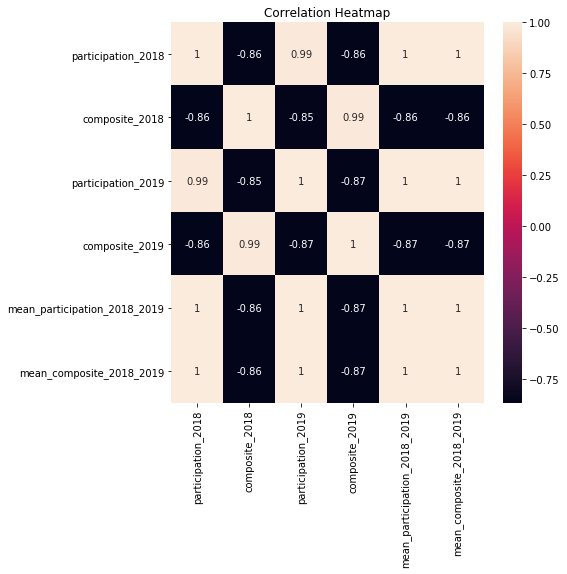

In [23]:
plt.figure(figsize = (7, 7))
sns.heatmap( data.corr(), annot = True )
plt.title("Correlation Heatmap");

**Interpretation:**The heatmap shows stronger relationship of all features with every other feature

### histograms

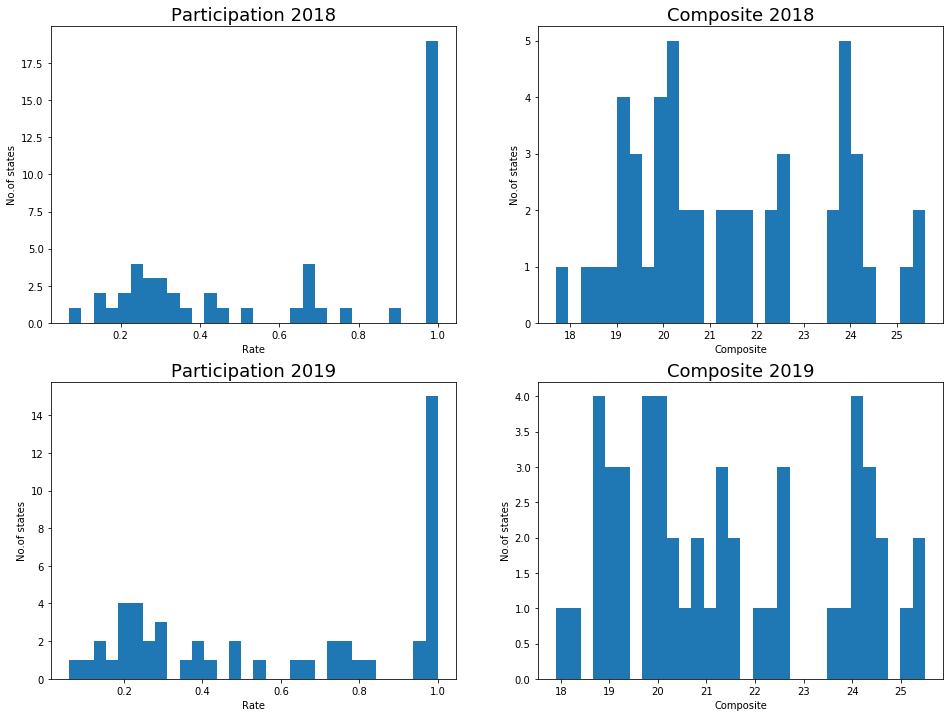

In [24]:
plt.figure(figsize = (16, 12))

plt.subplot(2, 2, 1)
plt.title("Participation 2018", fontsize = 18)
plt.hist( data[final_column_list[1]], bins = 30 )
plt.xlabel("Rate")
plt.ylabel("No.of states")

plt.subplot(2, 2, 2)
plt.title("Composite 2018", fontsize = 18)
plt.xlabel("Composite")
plt.ylabel("No.of states")

plt.hist( data[final_column_list[2]], bins = 30 );
plt.subplot(2, 2, 3)
plt.title("Participation 2019", fontsize = 18)
plt.hist( data[final_column_list[3]], bins = 30 )
plt.xlabel("Rate")
plt.ylabel("No.of states")

plt.subplot(2, 2, 4)
plt.title("Composite 2019", fontsize = 18)
plt.xlabel("Composite")
plt.ylabel("No.of states")
plt.hist( data[final_column_list[4]], bins = 30 );

**Interpretation:**From the histogram we can observe similar pattern in participation for both the years. In case of composite we can observe a significant difference in 2018 and 2019 data. 

### boxplots

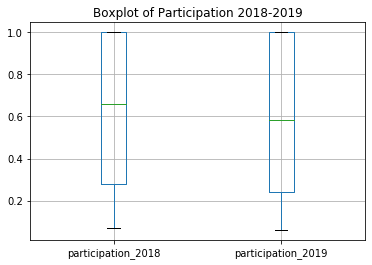

In [25]:
data.boxplot(['participation_2018','participation_2019'])
plt.title('Boxplot of Participation 2018-2019');

**Interpretation:**The boxplot gives information on median, 25th percentille and 75th percentile of participation for the given year. From the plot it is observed that there is a significant difference in median. while the values of 25th and 75th percentile remain the same.

### scattered plot

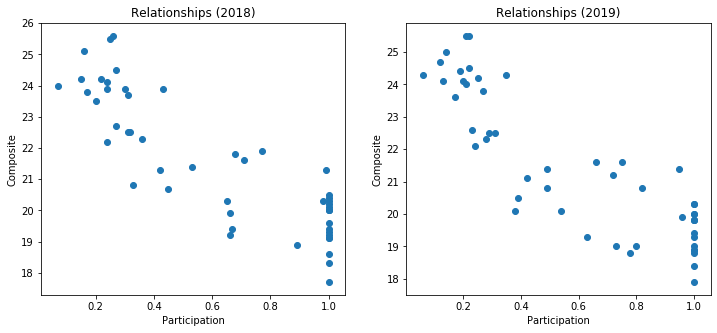

In [26]:
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
plt.title("Relationships (2018)")
plt.scatter( data[final_column_list[1]], data[final_column_list[2]] )
plt.xlabel("Participation")
plt.ylabel("Composite")

plt.subplot(1, 2, 2)
plt.title("Relationships (2019)")
plt.scatter( data[final_column_list[3]], data[final_column_list[4]] )
plt.xlabel("Participation")
plt.ylabel("Composite");

**Interpretation:**From the scatterd plot we can observe that, composite score is higher where there is less participation and composite score is less where participation is more.

## Conclusions and Recommendations

The ACT examination data for the years 2018 and 2019 is studied and required observations and trends were analysed. From the observation it is found that the trends of participation rate and composite score remain almost the same for each year. Where composite score shows inverse relation to participation rate. 

The cleaned data is ready to be an input to a machine learning model which can be used to predict the participation rate and composite score in future.